In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import folium
import os

<p style="font-size:2.5vw; color:purple;"> "Welcome to Wherever You Are"</p>

Here we'll enlarge our analysis to encompass every OECD Country for which we have a measure of inequality and election data

In [2]:
idea = pd.read_csv('IDEA-oecd_turnout_80_2017.csv')
idea[idea['Country'] == 'Korea, Republic of'].head()

,Country,Election type,Year,Voter Turnout,Registration,Voting age population,Population,Compulsory voting
222,"Korea, Republic of",Parliamentary,2016,58.03 %,"42,100,398","40,193,279","49,180,776",No
223,"Korea, Republic of",Parliamentary,2012,54.26 %,"40,205,055","38,752,951","48,860,500",No
224,"Korea, Republic of",Parliamentary,2008,46.01 %,"37,796,035","37,321,655","49,296,708",No
225,"Korea, Republic of",Parliamentary,2004,59.98 %,"35,596,497","35,910,736","48,289,037",No
226,"Korea, Republic of",Parliamentary,2000,57.21 %,"33,482,387","34,364,710","47,424,300",No


In [3]:
Countrydict = {}
for country in idea['Country'].unique().tolist():
    if os.path.isfile('./WID_Data_Metadata/WID_'+country+'.csv'):
        Countrydict[country] = pd.read_csv('./WID_Data_Metadata/WID_'+country+'.csv', engine="python", sep=";")


In [4]:
Merged_Dict = {}
for key in Countrydict.keys():
    Merged_Dict[key] = Countrydict[key].merge(idea[idea['Country']==key], how="inner")

In [5]:
len(Merged_Dict), Merged_Dict.keys() # We've got dataframes for 21 countries stored in a dict

(21,
 dict_keys(['Australia', 'Canada', 'Denmark', 'Finland', 'France', 'Germany', 'Hungary', 'Ireland', 'Italy', 'Japan', 'Korea, Republic of', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Spain', 'Sweden', 'Turkey', 'United Kingdom', 'United States']))

In [6]:
Merged_Dict['Korea, Republic of'].tail(4) # We can use the dict to access any Country's DataFrame we fancy

,Year,Pre-tax national income Top 10% share,Pre-tax national income Top 1% share,Net personal wealth Top 10% share,Net personal wealth Top 1% share,Country,Election type,Voter Turnout,Registration,Voting age population,Population,Compulsory voting
10,2007,0.423916,0.112832,NaN,NaN,"Korea, Republic of",Presidential,63.01 %,"37,653,518","36,974,899","49,044,790",No
11,2008,0.428622,0.113724,NaN,NaN,"Korea, Republic of",Parliamentary,46.01 %,"37,796,035","37,321,655","49,296,708",No
12,2012,0.448700,0.122300,NaN,NaN,"Korea, Republic of",Parliamentary,54.26 %,"40,205,055","38,752,951","48,860,500",No
13,2012,0.448700,0.122300,NaN,NaN,"Korea, Republic of",Presidential,75.84 %,"40,507,842","38,752,951","48,860,500",No


In [7]:
Merged_Dict['Australia']['Year'].max()

2013

In [8]:
Last_Known_Election_Dict = {}
for key in Merged_Dict.keys():
    Last_Known_Election_Dict[key] = Merged_Dict[key][Merged_Dict[key]['Year'] == Merged_Dict[key]['Year'].max()]

In [9]:
Last_Known_Election_Dict['United States']

,Year,Pre-tax national income Top 10% share,Pre-tax national income Top 1% share,Net personal wealth Top 10% share,Net personal wealth Top 1% share,Country,Election type,Voter Turnout,Registration,Voting age population,Population,Compulsory voting
26,2014,0.47017,0.202,0.72985,0.38562,United States,Parliamentary,42.50 %,"190,669,639","245,712,915","318,892,103",No


In [10]:
Last_Known_Election_Dict['Ireland']

,Year,Pre-tax national income Top 10% share,Pre-tax national income Top 1% share,Net personal wealth Top 10% share,Net personal wealth Top 1% share,Country,Election type,Voter Turnout,Registration,Voting age population,Population,Compulsory voting
9,2007,0.366666,0.116417,NaN,NaN,Ireland,Parliamentary,67.03 %,"3,110,914","3,026,706","4,234,925",No


In [11]:
Last_Election_Df = pd.DataFrame()
frames = []
for key in Last_Known_Election_Dict.keys():
    frames.append(Last_Known_Election_Dict[key])

Last_Election_Df = pd.concat(frames)

In [12]:
Last_Election_Df.head(3)

,Year,Pre-tax national income Top 10% share,Pre-tax national income Top 1% share,Net personal wealth Top 10% share,Net personal wealth Top 1% share,Country,Election type,Voter Turnout,Registration,Voting age population,Population,Compulsory voting
12,2013,0.318800,0.090700,NaN,NaN,Australia,Parliamentary,93.23 %,"14,722,754","17,406,251","22,262,501",Yes
8,2008,0.415478,0.143774,NaN,NaN,Canada,Parliamentary,59.52 %,"23,401,064","25,993,117","33,212,696",No
9,2007,0.260145,0.061202,NaN,NaN,Denmark,Parliamentary,86.59 %,"4,022,920","4,186,873","5,468,120",No


<p> Since we don't have access to wealth distribution for most of the countries, we will delete the two columns regarding this measure. Let's note however that, when the data will be available, looking at the effect of wealth distribution over electoral turnout would be a good way to take this research further.</p>

In [13]:
Last_Election_Df.drop(['Net personal wealth\nTop 10% share', 'Net personal wealth\nTop 1% share'], axis=1, inplace=True)

In [14]:
# for plotting purposes, let's get rid of the "%" sign in the "Voter Turnout" column
Last_Election_Df['Voter Turnout'] = Last_Election_Df['Voter Turnout'].astype(str)  \
                                                                     .apply(lambda x: x.strip(' %'))  \
                                                                     .astype(np.float64)

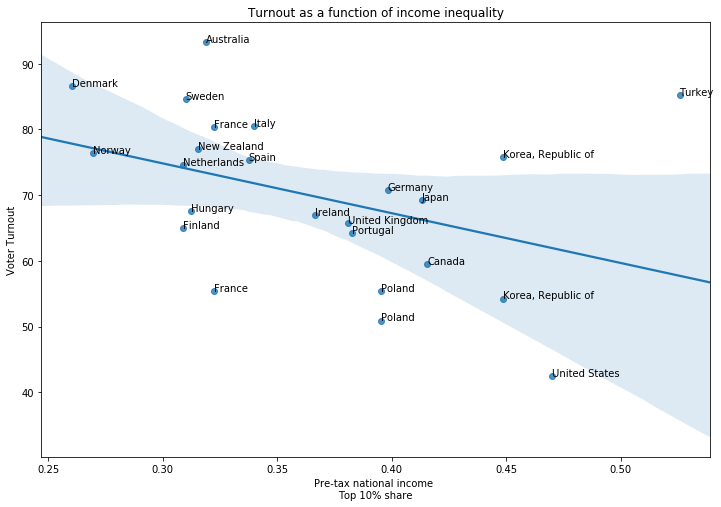

In [15]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))
        
def plot_reg(data, x, title):
    plt.figure(figsize=(12,8))
    x = data[x]
    y = data['Voter Turnout']
    labels = data['Country']
    
    ax = sns.regplot(x, y)
    ax.set(title=title)

    label_point(x, y, labels, ax)
    
plot_reg(Last_Election_Df, 'Pre-tax national income \nTop 10% share', 'Turnout as a function of income inequality')

<p style="font-size:2.5vw; color:purple;"> "Lies, Damn Lies and Statistics"</p>

We find three dots that are especially far from the regression line : one above the line is Turkey, the other one is Australia, and the last is the United States.
The reason for Australia and Turkey is quite simple : in both of these countries it is compulsory to vote !
Therefore they produce a bias. We will try to plot the graph without these two instances to see what happens :

In [16]:
idea[ idea['Country'].isin(['Turkey', 'Australia', 'United States'])].groupby('Country')['Compulsory voting'].unique()

Country
Australia        [Yes]
Turkey           [Yes]
United States     [No]
Name: Compulsory voting, dtype: object

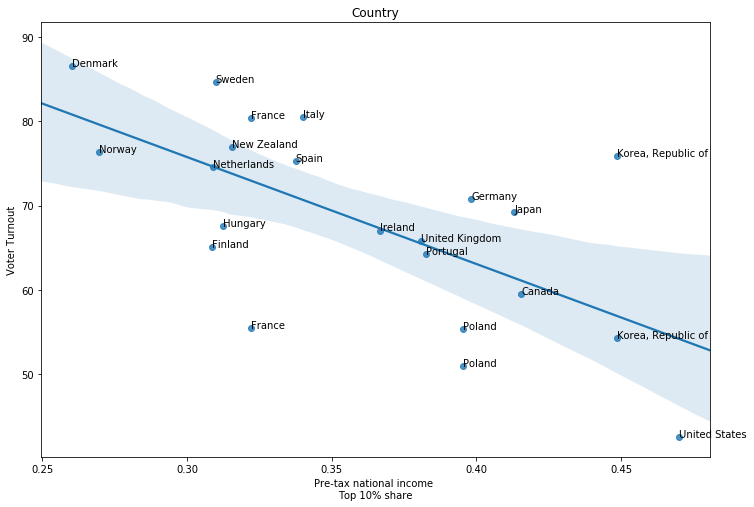

In [17]:
Last_Election_Df2 = Last_Election_Df[ ~Last_Election_Df['Country'].isin(['Australia', 'Turkey'])]

plot_reg(Last_Election_Df2, 'Pre-tax national income \nTop 10% share', 'Country')

In [18]:
x = Last_Election_Df2['Pre-tax national income \nTop 10% share']
y = Last_Election_Df2['Voter Turnout']

print('correlation coefficient:', pearsonr(x, y)[0])
print('p-value:', pearsonr(x, y)[1])

correlation coefficient: -0.6471161021928691
p-value: 0.0011332118129904584


<p>The correlation is even more clear when we remove the outliers. The lower the p-value, the more statistically significant  the relationship. Roughly speaking, a p-value can be interpreted as: "if there was no relationship at all between those two variables, what would be the probability that you'd observe such a correlation between them anyways ?". Generally, a p-value lower than 5% is accepted as being "statistically significant". Here the p-value is 0.1%.</p>

<p>In all these graphs, we plotted every country for which we had data available both on the economic inequalities AND on the voter turnout.</p>

<p><b>However</b>, we have to be careful in our conclusions, for two reasons:</p>
    
<ol>
    <li>we didn't have a lot of data, and p-value are not entirely reliable with few data. </li>
    <li>because these last-known elections range from 2005 to 2015. A shorter period of study (5 years, for example) would surely provide a better snapshot of whether economic inequality affects citizens participation in the electoral process. But we can't do much more as long as the data isn't available.</li>
</ol>

<p>Still, the original assumption was : the more unequal the country, the less  its citizens seem to engage in the process of choosing representatives. This graph still doesn't definitely prove that claim, but it certainly does not invalidate it</p>




<p style="font-size:2.5vw; color:purple;"> "Galileo": Plot a map of the world using Folium</p>

In [19]:
country_geo = 'folium/world-countries.json'

In [20]:
# Here I had to open the world-countries.json file and find the Code for 
# almost every country. If knows knows a better way to do this (or a
# file where they are all listed) I would be grateful !
CountryCode = []
for item in Last_Election_Df['Country'] :
    if item == 'United States':
        CountryCode.append('USA')
    elif item == 'United Kingdom':
        CountryCode.append('GBR')
    elif item == 'Denmark':
        CountryCode.append('DNK')
    elif item == 'Germany':
        CountryCode.append('DEU')
    elif item == 'New Zealand':
        CountryCode.append('NZL')
    elif item == 'Korea, Republic of':
        CountryCode.append('KOR')  
    elif item == 'Japan':
        CountryCode.append('JPN')  
    elif item == 'Ireland':
        CountryCode.append('IRL')
    elif item == 'Portugal':
        CountryCode.append('PRT')
    elif item == 'Spain':
        CountryCode.append('ESP')
    else:
        CountryCode.append(item[:3].upper())
    
Last_Election_Df['CountryCode'] = CountryCode

In [21]:
plot_data = Last_Election_Df[['CountryCode', 'Voter Turnout']]

map1 = folium.Map(location=[30, 0], zoom_start=1.4)

map1.choropleth(geo_data=country_geo, data=plot_data,
             columns=['CountryCode', 'Voter Turnout'],
             key_on='feature.id',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name="Voter Turnout, %")

map1.save('folium/Voter_Turnout.html')

C:\Users\Benjamin\Anaconda3\lib\site-packages\folium\folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [22]:
plot_data = Last_Election_Df[['CountryCode', 'Pre-tax national income \nTop 10% share']]

map2 = folium.Map(location=[30, 0], zoom_start=1.4)

map2.choropleth(geo_data=country_geo, data=plot_data,
             columns=['CountryCode', 'Pre-tax national income \nTop 10% share']*100,
             key_on='feature.id',
             fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2,
             legend_name="Pre-tax national income Top 10% share, %")

map2.save('folium/national_income_Top_10_share.html')

C:\Users\Benjamin\Anaconda3\lib\site-packages\folium\folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [27]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
from IPython.display import HTML
HTML('<iframe src=folium/Voter_Turnout.html width=480 height=300></iframe>')
HTML('<iframe src=folium/national_income_Top_10_share.html width=480 height=300></iframe>')

# See how the countries that have the lightest blue (less participation), also have the stronger red ? 
# Grey is for countries on which we don't have data

<p style="font-size:2.5vw; color:purple;"> "Tomorrow": what YOU could do with this data</p>

Feel free to download and use the data. It's made freely available by the World Income Database and the IDEA think tank. Even plotting basic graphs can be pretty interesting. Here's how you can see that top earners in england used to take 6-7% of the cake thirty years ago, and now each year they take home more than 12% of it.

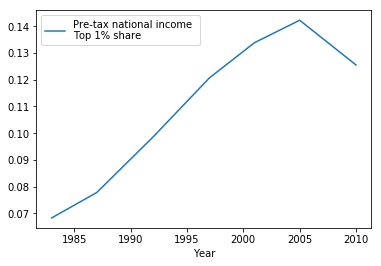

In [24]:
Merged_Dict['United Kingdom'].plot('Year', 'Pre-tax national income \nTop 1% share') 
# See how the 2007 crisis affected The City here ?

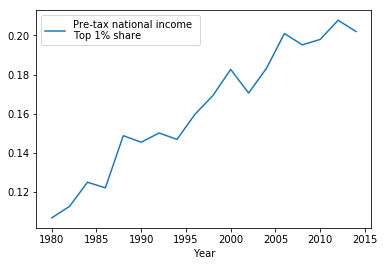

In [25]:
Merged_Dict['United States'].plot('Year', 'Pre-tax national income \nTop 1% share') 

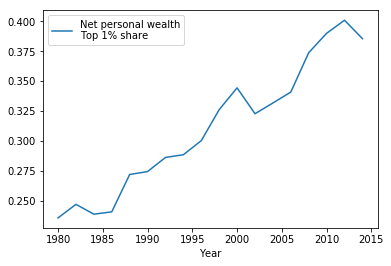

In [26]:
Merged_Dict['United States'].plot('Year', 'Net personal wealth\nTop 1% share') 